<a href="https://colab.research.google.com/github/Vivek-Hiremath55/Telecom_Churn_Pred-Half-/blob/main/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [5]:
from google.colab import files

In [6]:
upload = files.upload()

Saving train.csv to train.csv


In [259]:
df = pd.read_csv('train.csv')

# EDA

In [260]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [261]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [262]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [263]:
df.shape

(69999, 172)

In [264]:
print(4000 * 100 / 69999)
print(52000 * 100 / 69999)

5.714367348104973
74.28677552536465


A few columns have about 74% of their data missing. Thus, eliminating these columns.

In [265]:
i = 0
for col in df.columns:
    if df[col].isnull().sum() >= 4000:
        df = df.drop(col, axis = 1)
        i = i + 1
print(i)

30


In [266]:
df.shape

(69999, 142)

In [267]:
df.isnull().sum()

id                         0
circle_id                  0
loc_og_t2o_mou           702
std_og_t2o_mou           702
loc_ic_t2o_mou           702
last_date_of_month_6       0
last_date_of_month_7     399
last_date_of_month_8     733
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             2768
onnet_mou_7             2687
onnet_mou_8             3703
offnet_mou_6            2768
offnet_mou_7            2687
offnet_mou_8            3703
roam_ic_mou_6           2768
roam_ic_mou_7           2687
roam_ic_mou_8           3703
roam_og_mou_6           2768
roam_og_mou_7           2687
roam_og_mou_8           3703
loc_og_t2t_mou_6        2768
loc_og_t2t_mou_7        2687
loc_og_t2t_mou_8        3703
loc_og_t2m_mou_6        2768
loc_og_t2m_mou_7        2687
loc_og_t2m_mou_8        3703
loc_og_t2f_mou_6        2768
loc_og_t2f_mou_7        2687
loc_og_t2f_mou_8        3703
loc_og_t2c_mou_6        2768
loc_og_t2c_mou_7        2687
loc_og_t2c_mou

The missing data accounts for about 5% of the total dataset

In [268]:
df.churn_probability.sum() * 100 / 69999

10.188716981671167

About 10% of the total provided data has the churn label.

And a max of 5.7% data is missing from an individual varible.

In [269]:
df_churn = df[df.churn_probability == 1]

In [270]:
print(df_churn.shape)

(7132, 142)


In [271]:
df_churn.isnull().sum().sum() * 100 / df.isnull().sum().sum()

58.38145430091807

In [272]:
df_churn.shape


(7132, 142)

In [273]:
df_churn.isnull().sum().max() * 100 / 7132

41.236679753224905

However, about 58% of the missing data belongs to the churned category. Thus, dropping null values would result in loss of valuable information in this case.

And the maximum number of rows (entries) that we would have to delete / use manipulated variables would account for nearly 41% of the total entries in the churn section.


We can assume the behaviour of churning clients is the same and replace all the null values with the mode value of that variable / column.

OR

We could replace them with the mean of that column.


### Message for study partner ->
For some reason my laptop freezes everytime I try to dropna(). I couldn't figure out the issue and it is persistent.

As a result I couldn't drop any of the null values. I've tried it after defragmenting the drive but to no success.


In [274]:
df['circle_id'].describe()

count    69999.0
mean       109.0
std          0.0
min        109.0
25%        109.0
50%        109.0
75%        109.0
max        109.0
Name: circle_id, dtype: float64

In [275]:
df['loc_og_t2o_mou'].describe()

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64

In [276]:
df['std_og_t2o_mou'].describe()

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64

In [277]:
df['loc_ic_t2o_mou'].describe()

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64

In [278]:
df = df.drop(['loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','circle_id'], axis = 1)

Total monthly reacharge per month

In [279]:
df['TotMnth_6'] = df.monthly_2g_6 + df.monthly_3g_6
df['TotMnth_7'] = df.monthly_2g_7 + df.monthly_3g_7
df['TotMnth_8'] = df.monthly_2g_8 + df.monthly_3g_8

In [280]:
df['TotSac_6'] = df.sachet_3g_6 + df.sachet_2g_6
df['TotSac_7'] = df.sachet_3g_7 + df.sachet_2g_7
df['TotSac_8'] = df.sachet_3g_8 + df.sachet_2g_8

Attempting to identify the increasing or decreasing trends in recharge frequency between months

In [281]:
df['Mnth_6-7'] = (df.TotMnth_7 - df.TotMnth_6)
df['Mnth_7-8'] = (df.TotMnth_8 - df.TotMnth_7)
df['Mnth_6-8'] = (df.TotMnth_8 - df.TotMnth_6)
df['Sac_6-7'] = (df.TotSac_7 - df.TotSac_6)
df['Sac_7-8'] = (df.TotSac_8 - df.TotSac_7)
df['Sac_6-8'] = (df.TotSac_8 - df.TotSac_6)

Trend analysis for data volume on a monthly basis

In [282]:
df['TotData_6'] = df.vol_2g_mb_6 + df.vol_3g_mb_6
df['TotData_7'] = df.vol_2g_mb_7 + df.vol_3g_mb_7
df['TotData_8'] = df.vol_2g_mb_8 + df.vol_3g_mb_8

df['DataChange6-7'] = (df.TotData_7 - df.TotData_6)
df['DataChange7-8'] = (df.TotData_8 - df.TotData_7)
df['DataChange6-8'] = (df.TotData_8 - df.TotData_6)

Trend Analysis on Recharge Amount.

In [283]:
df['RechChange_6-7'] = df.last_day_rch_amt_7 - df.last_day_rch_amt_6
df['RechChange_7-8'] = df.last_day_rch_amt_8 - df.last_day_rch_amt_7
df['RechChange_6-8'] = df.last_day_rch_amt_8 - df.last_day_rch_amt_6

Analysisng trends in total minutes of usage on monthly basis for both incoming and outgoing call

In [284]:
df['TotIC_mou_Chng_6-7'] = df.total_ic_mou_7 - df.total_ic_mou_6
df['TotIC_mou_Chng_7-8'] = df.total_ic_mou_8 - df.total_ic_mou_7
df['TotIC_mou_Chng_6-8'] = df.total_ic_mou_8 - df.total_ic_mou_6

df['TotOG_mou_Chng_6-7'] = df.total_og_mou_7 - df.total_og_mou_6
df['TotOG_mou_Chng_7-8'] = df.total_og_mou_8 - df.total_og_mou_7
df['TotOG_mou_Chng_6-8'] = df.total_og_mou_8 - df.total_og_mou_6

The Data doesn't have any direct varible mentionig customer staisfaction / feedback.

But the calls made to customer care may / may not be reflect the feedback report.

The increasing number of calls (Time spent on calls) may indicate increasing complaints.

In [285]:
df.loc_og_t2c_mou_8.shape

(69999,)

In [286]:
p = 0
q = 0
r = 0

for i in range(0,69999):
    if pd.isna(df.loc_og_t2c_mou_6[i]):
        df.loc_og_t2c_mou_6[i] = 0
        p = p + 1
for i in range(0,69999):
    if pd.isna(df.loc_og_t2c_mou_7[i]):
        df.loc_og_t2c_mou_7[i] = 0
        q = q + 1
for i in range(0,69999):
    if pd.isna(df.loc_og_t2c_mou_8[i]):
        df.loc_og_t2c_mou_8[i] = 0
        r = r + 1

print(p,q,r)

<ipython-input-286-39e14a4af97d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc_og_t2c_mou_6[i] = 0
<ipython-input-286-39e14a4af97d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc_og_t2c_mou_7[i] = 0
<ipython-input-286-39e14a4af97d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc_og_t2c_mou_8[i] = 0


2768 2687 3703


In [287]:
df['CustCall_6-7'] = df.loc_og_t2c_mou_7 - df.loc_og_t2c_mou_6
df['CustCall_7-8'] = df.loc_og_t2c_mou_8 - df.loc_og_t2c_mou_7
df['CustCall_6-8'] = df.loc_og_t2c_mou_8 - df.loc_og_t2c_mou_6

In [288]:
df['CustCall_6-8'].head(10)

0     0.00
1    29.79
2    -2.14
3     8.03
4     0.00
5   -11.50
6     0.00
7     0.00
8     0.00
9     0.00
Name: CustCall_6-8, dtype: float64

Average Revenue per user trend

In [289]:
df['Rev_Chng_6-7'] = df.arpu_7 - df.arpu_6
df['Rev_Chng_7-8'] = df.arpu_8 - df.arpu_7
df['Rev_Chng_6-8'] = df.arpu_8 - df.arpu_6


We could've substituted the orignal changed values to dummy variables for eg;
1. A increase in values could be denoted by +1
2. A decrease in values could be denoted by -1
3. No net change could be denoted by 0

But this might not be so effective as an increment or decrement may not necessarily denote the probability to churn. But the actual values might provide some insight on the same.

In [290]:
df = df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis = 1)

A lot of the missing information belongs to the entries with churn label. And using manipulated values for the same would result in incorrect predictions.

Thus, droping all the null values in the dataframe.

In [291]:
df_3 = df_2.drop(['last_day_rch_amt_8','last_day_rch_amt_7','last_day_rch_amt_6','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'], axis = 1)

In [292]:
df_2 = df.dropna()

print(df_2.shape)

(61895, 168)


In [293]:
df_2.isnull().sum().sum()

0

# Model Building

Using PCA to reduce the dimesionality of this huge chunk of data

In [294]:
y = df_2.pop('churn_probability')

In [295]:
from sklearn.preprocessing import StandardScaler

In [296]:
scaler = StandardScaler()

In [297]:
df_3.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,TotIC_mou_Chng_6-8,TotOG_mou_Chng_6-7,TotOG_mou_Chng_7-8,TotOG_mou_Chng_6-8,CustCall_6-7,CustCall_7-8,CustCall_6-8,Rev_Chng_6-7,Rev_Chng_7-8,Rev_Chng_6-8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,28.72,140.47,-218.05,-77.58,0.00,0.00,0.00,55.732,-79.482,-23.750
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,21.60,30.73,0.93,31.66,22.01,7.78,29.79,122.787,-79.834,42.953
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,-87.65,42.87,-99.36,-56.49,-2.14,0.00,-2.14,42.370,-103.176,-60.806
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,-11.27,19.95,-42.14,-22.19,0.00,8.03,8.03,48.898,-94.165,-45.267
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,6.77,-20.32,-27.18,-47.50,9.85,-9.85,0.00,-112.517,-26.626,-139.143


In [299]:
#df_3 = df_3.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1)


In [300]:
for col in df_3.columns:
  df_3[col] = df_3[col].astype(float)

In [301]:
X = df_3

In [302]:
X = scaler.fit_transform(X)

In [303]:
X

array([[-1.73499954, -0.78585745, -0.5956595 , ...,  0.24392987,
        -0.36847353, -0.10368762],
       [-1.73495001, -0.87956173, -0.49374009, ...,  0.551357  ,
        -0.37008449,  0.14958467],
       [-1.73490049, -0.69739008, -0.54960519, ...,  0.18266909,
        -0.47691103, -0.24438981],
       ...,
       [ 1.7313795 ,  0.2351948 , -0.10749861, ..., -0.53292941,
         0.09325767, -0.36399578],
       [ 1.73142903, -0.16480329, -0.14441727, ...,  0.01977007,
        -0.46398676, -0.36857878],
       [ 1.73147855, -0.37543645, -0.72155325, ..., -0.5867538 ,
         0.56802296, -0.01467799]])

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [306]:
from sklearn.decomposition import PCA

In [307]:
pca = PCA(random_state = 42)

In [308]:
pca.fit(X_train)

PCA(random_state=42)

In [309]:
pca.components_

array([[ 0.00130169,  0.17807671,  0.18163984, ...,  0.01982447,
        -0.00286186,  0.0140441 ],
       [ 0.00181797, -0.01175542, -0.01642166, ..., -0.00844007,
         0.00778453, -0.00053147],
       [-0.00039621, -0.04395081, -0.0708199 , ..., -0.04672124,
        -0.00432261, -0.04228048],
       ...,
       [-0.        ,  0.03831204,  0.03218109, ..., -0.1159975 ,
        -0.09617243,  0.17029029],
       [ 0.        , -0.09722935, -0.08158261, ...,  0.02011726,
        -0.03062759, -0.10100717],
       [ 0.        , -0.02691939, -0.02580464, ..., -0.11622287,
        -0.13249102,  0.11909303]])

In [310]:
pca.explained_variance_ratio_

array([1.06391819e-01, 6.84448622e-02, 6.05549736e-02, 3.95493468e-02,
       3.92123535e-02, 3.83924235e-02, 2.76180151e-02, 2.55997831e-02,
       2.43976303e-02, 2.37177179e-02, 2.16054886e-02, 2.12379609e-02,
       2.05429534e-02, 1.96287448e-02, 1.94462493e-02, 1.85450821e-02,
       1.72309442e-02, 1.70255813e-02, 1.63580855e-02, 1.47340126e-02,
       1.44465186e-02, 1.41743918e-02, 1.36890683e-02, 1.30066023e-02,
       1.22827987e-02, 1.19468404e-02, 1.16189549e-02, 1.15023243e-02,
       1.08703761e-02, 1.06604765e-02, 1.04448775e-02, 1.00008477e-02,
       9.80102485e-03, 9.72655824e-03, 8.67413801e-03, 8.13018073e-03,
       7.51242229e-03, 7.45810048e-03, 7.18415744e-03, 6.55283675e-03,
       6.46568438e-03, 6.32766079e-03, 6.28043673e-03, 6.10203428e-03,
       5.52733211e-03, 5.34285649e-03, 5.19165344e-03, 5.03493156e-03,
       4.86401172e-03, 4.56479186e-03, 4.39733297e-03, 4.16500102e-03,
       3.93887419e-03, 3.71169289e-03, 3.48598988e-03, 3.23550994e-03,
      

In [311]:
import matplotlib.pyplot as plt

<BarContainer object of 161 artists>

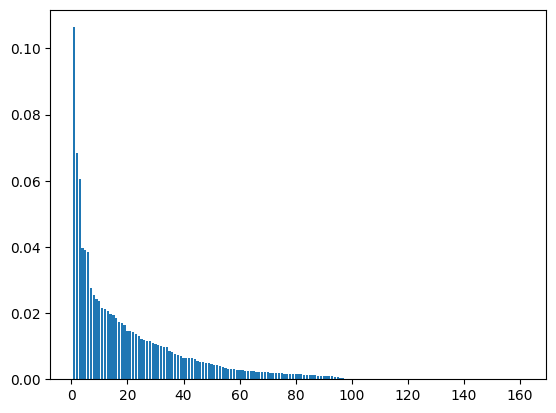

In [312]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [313]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

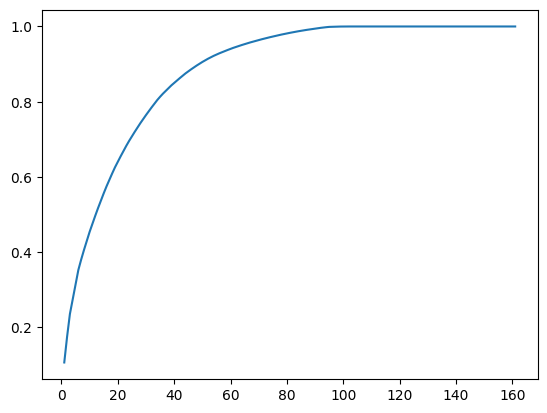

In [314]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), var_cum)

In [315]:
pca_2 = PCA(0.9)

In [316]:
pca_trained = pca_2.fit_transform(X_train)

In [317]:
pca_trained.shape

(43326, 49)

In [318]:
from sklearn.linear_model import LogisticRegression

In [319]:
log_reg = LogisticRegression()

In [320]:
model = log_reg.fit(pca_trained, y_train)

In [321]:
pca_test = pca_2.transform(X_test)

In [322]:
pred = model.predict_proba(pca_test)

In [323]:
pred_df = pd.DataFrame(pred)

In [324]:
pred_1 = pred_df.iloc[:,[1]]
pred_1.head()

,1
0,0.128557
1,0.003253
2,0.126756
3,0.136705
4,0.006789


In [325]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
31014,0
17452,0
29504,0
27913,0
66586,0


In [326]:
from sklearn import metrics

In [327]:
metrics.roc_auc_score(y_test_df, pred_1)

0.8412528934838368

In [334]:
upload_2 = files.upload()

Saving test.csv to test (1).csv


In [335]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [336]:
df_test.isnull().sum().sum()

788051

In [337]:
df_test.isnull().sum().max()

22415

In [338]:
df_test.shape

(30000, 171)

Now perform the same tasks on this CSV file as well.